In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import re

import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/vivek2011383/EDA-Exercise/refs/heads/main/amazon.csv")

In [88]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [89]:
df.shape

(1465, 16)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [91]:
# Cleaning "rating" column:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.dropna(subset=['rating'], inplace=True)
df['rating'] = df['rating'].astype(float)

In [92]:
# Cleaning "discounted_price" column:
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True)
df['discounted_price'] = df['discounted_price'].astype(float)

In [93]:
# Cleaning "actual_price" column:
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True)  # Remove ₹ and commas
df['actual_price'] = df['actual_price'].astype(float)

In [94]:
# Cleaning "discount_percentage" column:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = df['discount_percentage'].astype(float)

df.rename(columns={'discount_percentage': 'discount_percentage (%)'}, inplace=True)

In [95]:
df.dropna(inplace=True)

In [96]:
# Cleaning "rating_count" column:
df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = df['rating_count'].astype(int)

In [97]:
df.dtypes

product_id                  object
product_name                object
category                    object
discounted_price           float64
actual_price               float64
discount_percentage (%)    float64
rating                     float64
rating_count                 int64
about_product               object
user_id                     object
user_name                   object
review_id                   object
review_title                object
review_content              object
img_link                    object
product_link                object
dtype: object

In [98]:
#1.  What is the average rating for each product category?

avg_ratings = df.groupby('category')['rating'].mean().reset_index()
avg_ratings = avg_ratings.sort_values(by='rating', ascending=False)
print(avg_ratings)

                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


In [99]:
#2. What are the top rating_count products by category?

top_rated = df.loc[df.groupby('category')['rating_count'].idxmax()]
top_rated = top_rated.sort_values(by='category')

top_rated[['category', 'product_name', 'rating_count']]

,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,1118
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4426
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,7222
748,Computers&Accessories|Accessories&Peripherals|...,JBL Commercial CSLM20B Auxiliary Omnidirection...,14969
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,7352
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,5792
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",6199
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,5719
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10",4308


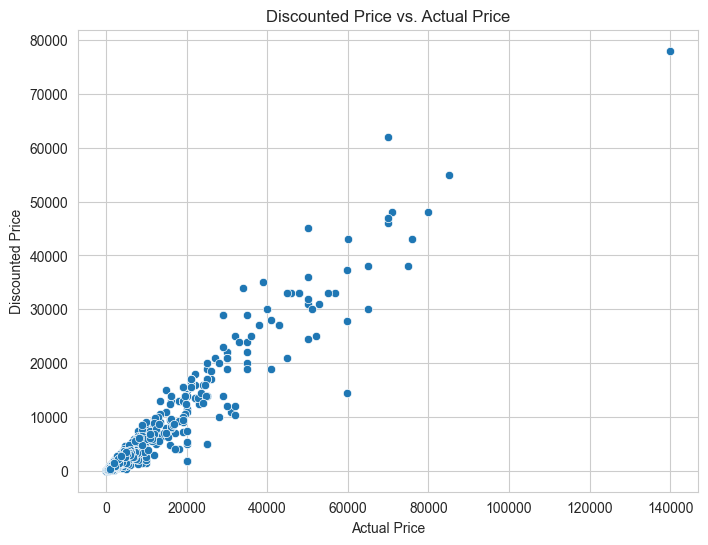

In [100]:
#3. What is the distribution of discounted prices vs. actual prices?

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

In [104]:
#4. How does the average discount percentage vary across categories?

avg_discount_by_category = df.groupby('category')['discount_percentage (%)'].mean().reset_index()
avg_discount_by_category = avg_discount_by_category.sort_values(by='discount_percentage (%)', ascending=False)

avg_discount_by_category

,category,discount_percentage (%)
6,Computers&Accessories|Accessories&Peripherals|...,90.0
75,"Electronics|Headphones,Earbuds&Accessories|Ear...",90.0
106,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
73,"Electronics|Headphones,Earbuds&Accessories|Ada...",88.0
14,Computers&Accessories|Accessories&Peripherals|...,87.5
...,...,...
197,OfficeProducts|OfficeElectronics|Calculators|F...,0.0
199,OfficeProducts|OfficePaperProducts|Paper|Copy&...,0.0
205,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0


In [105]:
#5. What are the most popular product names?

most_popular = df.sort_values(by='rating_count', ascending=False)

most_popular = most_popular.drop_duplicates(subset='product_name')

top_n = most_popular[['product_name', 'rating_count']].head(10)

print(top_n)

                                          product_name  rating_count
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...        426973
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...        426973
12   AmazonBasics Flexible Premium HDMI Cable (Blac...        426973
400  boAt Bassheads 100 in Ear Wired Earphones with...        363713
352  boAt Bassheads 100 in Ear Wired Earphones with...        363713
584  boAt BassHeads 100 in-Ear Wired Headphones wit...        363711
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...        313836
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...        313836
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...        313832
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...        313832


In [108]:
#6.  What are the most popular product keywords?

product_names = df['product_name'].str.lower()  
words = product_names.str.cat(sep=' ').split()   

#Clean the words (remove punctuation, digits, etc.)
cleaned_words = [re.sub(r'\W+', '', word) for word in words] 

#frequency of each word
word_count = Counter(cleaned_words)

#The most common keywords (top 10)
top_keywords = word_count.most_common(10)

print(top_keywords)

[('', 1273), ('with', 750), ('for', 673), ('black', 466), ('cable', 399), ('usb', 390), ('and', 329), ('charging', 244), ('to', 214), ('fast', 209)]


In [109]:
#7. What are the most popular product reviews?

most_reviewed = df.sort_values(by='rating_count', ascending=False)
most_reviewed = most_reviewed.drop_duplicates(subset='product_name')

top_reviewed = most_reviewed[['product_name', 'rating_count']].head(10)

top_reviewed

,product_name,rating_count
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832


In [113]:
#8. What is the correlation between discounted_price and rating?

correlation = df['discounted_price'].corr(df['rating'])

print("Correlation between discounted_price and rating:", round(correlation, 3))

Correlation between discounted_price and rating: 0.121


In [115]:
#9. What are the Top 5 categories based on the highest ratings?

avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()
top_categories = avg_rating_by_category.sort_values(by='rating', ascending=False).head(5)

print(top_categories[['category', 'rating']])

                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


#10.  Identify any potential areas for improvement or optimization based on the data analysis?

- Home & Kitchen (including Kitchen & Home Appliances, Coffee, Tea & Espresso): Average Rating = 3.3
- Computers & Accessories (including Accessories & Peripherals, Laptop Accessories): Average Rating = 3.4

These categories have relatively lower ratings compared to others, indicating potential areas for improvement. We could focus on enhancing product quality, customer service, or refining product offerings in these categories to boost customer satisfaction and ratings.